## 1-й Датасет: Mobile Phone Price Prediction

https://www.kaggle.com/datasets/dewangmoghe/mobile-phone-price-prediction?resource=download

* Из названия датасета(описания у Kaggle не было предсталвено) очевидно, что объектами иследования являются смартфоны.
* Атрибуты объектов: id, name, spec_score, no_of_sim, RAM, battery, display, camera, external_memory, android_version, price, company, inbuilt_memory, fast_charging, screen_resolution, processor, processor_name
* Очевидная цель этого датасета - научиться предсказывать цену смартфона.

In [6]:
import pandas as pd
df = pd.read_csv(".//static//csv//mppp.csv", sep=",")
print('количество колонок: ' + str(df.columns.size))  
print('колонки: ' + ', '.join(df.columns))

df.info()
df.head()

количество колонок: 18
колонки: Unnamed: 0, Name, Rating, Spec_score, No_of_sim, Ram, Battery, Display, Camera, External_Memory, Android_version, Price, company, Inbuilt_memory, fast_charging, Screen_resolution, Processor, Processor_name
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 no

Unnamed: 0                                  Name  Rating  Spec_score  \
0           0                 Samsung Galaxy F14 5G    4.65          68   
1           1                    Samsung Galaxy A11    4.20          63   
2           2                    Samsung Galaxy A13    4.30          75   
3           3                    Samsung Galaxy F23    4.10          73   
4           4  Samsung Galaxy A03s (4GB RAM + 64GB)    4.10          69   

                       No_of_sim       Ram            Battery     Display  \
0  Dual Sim, 3G, 4G, 5G, VoLTE,   4 GB RAM  6000 mAh Battery   6.6 inches   
1      Dual Sim, 3G, 4G, VoLTE,   2 GB RAM  4000 mAh Battery   6.4 inches   
2      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM  5000 mAh Battery   6.6 inches   
3      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM   6000 mAh Battery  6.4 inches   
4      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM  5000 mAh Battery   6.5 inches   

                                              Camera  \
0    50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera   
1  13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...   
2            50 MP Quad Rear &amp; 8 MP Front Camera   
3           48 MP Quad Rear &amp; 13 MP Front Camera   
4  13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...   

                      External_Memory Android_version   Price  company  \
0    Memory Card Supported, upto 1 TB              13   9,999  Samsung   
1  Memory Card Supported, upto 512 GB              10   9,990  Samsung   
2    Memory Card Supported, upto 1 TB              12  11,999  Samsung   
3    Memory Card Supported, upto 1 TB              12  11,999  Samsung   
4    Memory Card Supported, upto 1 TB              11  11,999  Samsung   

    Inbuilt_memory       fast_charging  \
0   128 GB inbuilt   25W Fast Charging   
1    32 GB inbuilt   15W Fast Charging   
2    64 GB inbuilt   25W Fast Charging   
3    64 GB inbuilt                 NaN   
4    64 GB inbuilt   15W Fast Charging   

                               Screen_resolution             Processor  \
0   2408 x 1080 px Display with Water Drop Notch   Octa Core Processor   
1          720 x 1560 px Display with Punch Hole     1.8 GHz Processor   
2   1080 x 2408 px Display with Water Drop Notch       2 GHz Processor   
3                                  720 x 1600 px             Octa Core   
4    720 x 1600 px Display with Water Drop Notch             Octa Core   

  Processor_name  
0    Exynos 1330  
1      Octa Core  
2      Octa Core  
3      Helio G88  
4      Helio P35

# Получение сведений о пропущенных данных

Типы пропущенных данных:

* None - представление пустых данных в Python
* NaN - представление пустых данных в Pandas
* '' - пустая строка

In [7]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

Unnamed: 0             0
Name                   0
Rating                 0
Spec_score             0
No_of_sim              0
Ram                    0
Battery                0
Display                0
Camera                 0
External_Memory        0
Android_version      443
Price                  0
company                0
Inbuilt_memory        19
fast_charging         89
Screen_resolution      2
Processor             28
Processor_name         0
dtype: int64

Unnamed: 0           False
Name                 False
Rating               False
Spec_score           False
No_of_sim            False
Ram                  False
Battery              False
Display              False
Camera               False
External_Memory      False
Android_version       True
Price                False
company              False
Inbuilt_memory        True
fast_charging         True
Screen_resolution     True
Processor             True
Processor_name       False
dtype: bool

Android_version процент пустых значен

Судя по статистике выше, пустые значения всё-таки присутствуют. Наиболее корректным решением будет заполнение пропущенных данных, потому что количество объектов с пропущенными значениями составляет практически половину объектов датасета. Так как все атрибуты имеют строковый тип данных, воспользуемся заполнением наиболее частым значением.

In [11]:
df['Inbuilt_memory'].fillna(df['Inbuilt_memory'].mode()[0], inplace=True)
df['Processor'].fillna(df['Processor'].mode()[0], inplace=True)
df['Android_version'].fillna(df['Android_version'].mode()[0], inplace=True)
df['fast_charging'].fillna(df['fast_charging'].mode()[0], inplace=True)
df['Screen_resolution'].fillna(df['Screen_resolution'].mode()[0], inplace=True)

# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

Unnamed: 0           0
Name                 0
Rating               0
Spec_score           0
No_of_sim            0
Ram                  0
Battery              0
Display              0
Camera               0
External_Memory      0
Android_version      0
Price                0
company              0
Inbuilt_memory       0
fast_charging        0
Screen_resolution    0
Processor            0
Processor_name       0
dtype: int64

Unnamed: 0           False
Name                 False
Rating               False
Spec_score           False
No_of_sim            False
Ram                  False
Battery              False
Display              False
Camera               False
External_Memory      False
Android_version      False
Price                False
company              False
Inbuilt_memory       False
fast_charging        False
Screen_resolution    False
Processor            False
Processor_name       False
dtype: bool



Проверим выбросы и устраним их:

In [14]:
numeric_columns = ['Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram', 'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version', 'Price', 'company', 'Inbuilt_memory', 'fast_charging', 'Screen_resolution', 'Processor', 'Processor_name']
for column in numeric_columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        q1 = df[column].quantile(0.25)  # Находим 1-й квартиль (Q1)
        q3 = df[column].quantile(0.75)  # Находим 3-й квартиль (Q3)
        iqr = q3 - q1  # Вычисляем межквартильный размах (IQR)

        # Определяем границы для выбросов
        lower_bound = q1 - 1.5 * iqr  # Нижняя граница
        upper_bound = q3 + 1.5 * iqr  # Верхняя граница

        # Подсчитываем количество выбросов
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]

        # Устраняем выбросы: заменяем значения ниже нижней границы на саму нижнюю границу, а выше верхней — на верхнюю
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

        print(f"Колонка {column}:")
        print(f"  Есть выбросы: {'Да' if outlier_count > 0 else 'Нет'}")
        print(f"  Количество выбросов: {outlier_count}")
        print(f"  Минимальное значение: {df[column].min()}")
        print(f"  Максимальное значение: {df[column].max()}")
        print(f"  1-й квартиль (Q1): {q1}")
        print(f"  3-й квартиль (Q3): {q3}\n")

Колонка Rating:
  Есть выбросы: Нет
  Количество выбросов: 0
  Минимальное значение: 3.75
  Максимальное значение: 4.75
  1-й квартиль (Q1): 4.15
  3-й квартиль (Q3): 4.55

Колонка Spec_score:
  Есть выбросы: Нет
  Количество выбросов: 0
  Минимальное значение: 58.5
  Максимальное значение: 98.0
  1-й квартиль (Q1): 75.0
  3-й квартиль (Q3): 86.0



Постараемся выявить зависимости Outcome от остальных колонок:

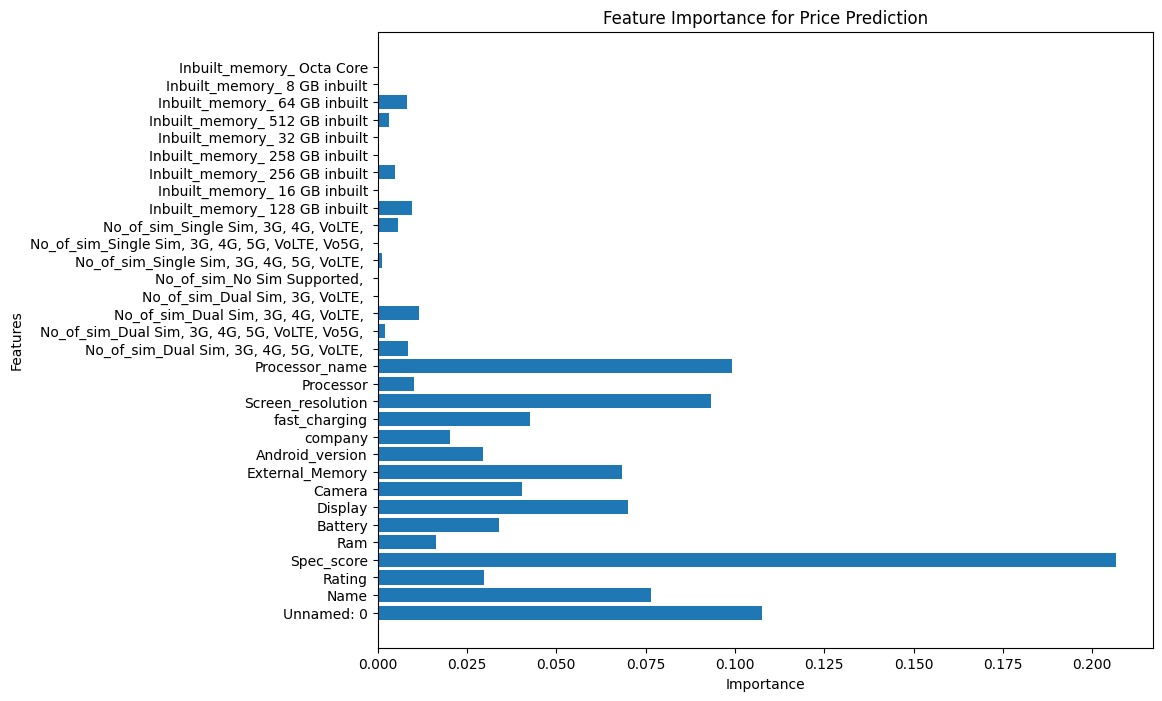

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Сначала Label Encoding для упорядоченных категорий (если нужно)
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':  # Если тип данных - строка
        if df[column].nunique() <= 10:  # Если небольшое количество уникальных значений, применяем One-Hot Encoding
            df = pd.get_dummies(df, columns=[column], drop_first=True)
        else:
            df[column] = label_encoder.fit_transform(df[column])

# Удаление строки "Price" из признаков (она является целевой переменной)
X = df.drop('Price', axis=1)  # Все признаки, кроме цены
y = df['Price']

# Создание модели RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Определение важности признаков
feature_importances = model.feature_importances_
features = X.columns

# Визуализация важности признаков
plt.figure(figsize=(10, 8))
plt.barh(features, feature_importances)
plt.title('Feature Importance for Price Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Price', axis=1)  # Все признаки, кроме цены
y = df['Price']  # Целевая переменная (цена)

# Сначала разбиваем данные на обучающую и промежуточную выборки (80% обучающих данных и 20% тестовых)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Теперь делим временные данные (X_temp и y_temp) на контрольную (валидационную) и тестовую выборки (по 20% каждой)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Выводим размеры выборок для проверки
print(f'Размер обучающей выборки: {X_train.shape}')
print(f'Размер контрольной выборки: {X_val.shape}')
print(f'Размер тестовой выборки: {X_test.shape}')

Размер обучающей выборки: (822, 32)
Размер контрольной выборки: (274, 32)
Размер тестовой выборки: (274, 32)
